In [326]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

import warnings 
warnings.filterwarnings('ignore')


In [327]:
#importing datset
df=pd.read_csv("C:\\Users\\Umesh Gupta\\Downloads\Automobile_insurance_fraud.csv")
pd.set_option('display.max_columns',None)
df.head()

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,insured_sex,insured_education_level,insured_occupation,insured_hobbies,insured_relationship,capital-gains,capital-loss,incident_date,incident_type,collision_type,incident_severity,authorities_contacted,incident_state,incident_city,incident_location,incident_hour_of_the_day,number_of_vehicles_involved,property_damage,bodily_injuries,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,_c39
0,328,48,521585,17-10-2014,OH,250/500,1000,1406.91,0,466132,MALE,MD,craft-repair,sleeping,husband,53300,0,25-01-2015,Single Vehicle Collision,Side Collision,Major Damage,Police,SC,Columbus,9935 4th Drive,5,1,YES,1,2,YES,71610,6510,13020,52080,Saab,92x,2004,Y,NaN
1,228,42,342868,27-06-2006,IN,250/500,2000,1197.22,5000000,468176,MALE,MD,machine-op-inspct,reading,other-relative,0,0,21-01-2015,Vehicle Theft,?,Minor Damage,Police,VA,Riverwood,6608 MLK Hwy,8,1,?,0,0,?,5070,780,780,3510,Mercedes,E400,2007,Y,NaN
2,134,29,687698,06-09-2000,OH,100/300,2000,1413.14,5000000,430632,FEMALE,PhD,sales,board-games,own-child,35100,0,22-02-2015,Multi-vehicle Collision,Rear Collision,Minor Damage,Police,NY,Columbus,7121 Francis Lane,7,3,NO,2,3,NO,34650,7700,3850,23100,Dodge,RAM,2007,N,NaN
3,256,41,227811,25-05-1990,IL,250/500,2000,1415.74,6000000,608117,FEMALE,PhD,armed-forces,board-games,unmarried,48900,-62400,10-01-2015,Single Vehicle Collision,Front Collision,Major Damage,Police,OH,Arlington,6956 Maple Drive,5,1,?,1,2,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y,NaN
4,228,44,367455,06-06-2014,IL,500/1000,1000,1583.91,6000000,610706,MALE,Associate,sales,board-games,unmarried,66000,-46000,17-02-2015,Vehicle Theft,?,Minor Damage,None,NY,Arlington,3041 3rd Ave,20,1,NO,0,1,NO,6500,1300,650,4550,Accura,RSX,2009,N,NaN


In [328]:
#checking shape
df.shape

(1000, 40)

In [329]:
#checking datatype of object
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 40 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   months_as_customer           1000 non-null   int64  
 1   age                          1000 non-null   int64  
 2   policy_number                1000 non-null   int64  
 3   policy_bind_date             1000 non-null   object 
 4   policy_state                 1000 non-null   object 
 5   policy_csl                   1000 non-null   object 
 6   policy_deductable            1000 non-null   int64  
 7   policy_annual_premium        1000 non-null   float64
 8   umbrella_limit               1000 non-null   int64  
 9   insured_zip                  1000 non-null   int64  
 10  insured_sex                  1000 non-null   object 
 11  insured_education_level      1000 non-null   object 
 12  insured_occupation           1000 non-null   object 
 13  insured_hobbies    

In [330]:
#checking basic info 
df.describe()

,months_as_customer,age,policy_number,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,capital-gains,capital-loss,incident_hour_of_the_day,number_of_vehicles_involved,bodily_injuries,witnesses,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_year,_c39
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1.000000e+03,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000,0.0
mean,203.954000,38.948000,546238.648000,1136.000000,1256.406150,1.101000e+06,501214.488000,25126.100000,-26793.700000,11.644000,1.83900,0.992000,1.487000,52761.94000,7433.420000,7399.570000,37928.950000,2005.103000,NaN
std,115.113174,9.140287,257063.005276,611.864673,244.167395,2.297407e+06,71701.610941,27872.187708,28104.096686,6.951373,1.01888,0.820127,1.111335,26401.53319,4880.951853,4824.726179,18886.252893,6.015861,NaN
min,0.000000,19.000000,100804.000000,500.000000,433.330000,-1.000000e+06,430104.000000,0.000000,-111100.000000,0.000000,1.00000,0.000000,0.000000,100.00000,0.000000,0.000000,70.000000,1995.000000,NaN
25%,115.750000,32.000000,335980.250000,500.000000,1089.607500,0.000000e+00,448404.500000,0.000000,-51500.000000,6.000000,1.00000,0.000000,1.000000,41812.50000,4295.000000,4445.000000,30292.500000,2000.000000,NaN
50%,199.500000,38.000000,533135.000000,1000.000000,1257.200000,0.000000e+00,466445.500000,0.000000,-23250.000000,12.000000,1.00000,1.000000,1.000000,58055.00000,6775.000000,6750.000000,42100.000000,2005.000000,NaN
75%,276.250000,44.000000,759099.750000,2000.000000,1415.695000,0.000000e+00,603251.000000,51025.000000,0.000000,17.000000,3.00000,2.000000,2.000000,70592.50000,11305.000000,10885.000000,50822.500000,2010.000000,NaN
max,479.000000,64.000000,999435.000000,2000.000000,2047.590000,1.000000e+07,620962.000000,100500.000000,0.000000,23.000000,4.00000,2.000000,3.000000,114920.00000,21450.000000,23670.000000,79560.000000,2015.000000,NaN


<AxesSubplot:>

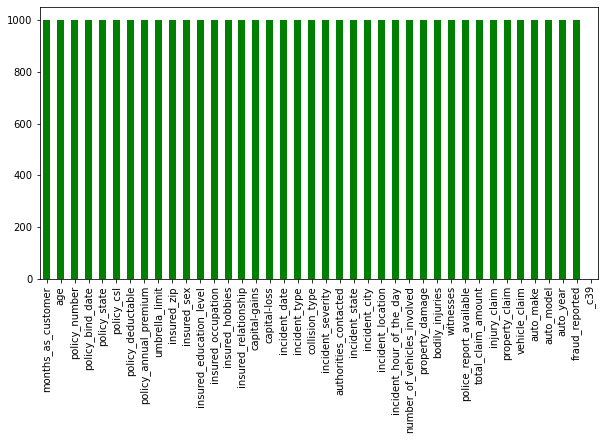

In [331]:
#checking nan value
df.count().plot.bar(figsize=(10,5),color="g")

In [332]:
#checking for "?"
df.isin(["?"]).sum()

months_as_customer               0
age                              0
policy_number                    0
policy_bind_date                 0
policy_state                     0
policy_csl                       0
policy_deductable                0
policy_annual_premium            0
umbrella_limit                   0
insured_zip                      0
insured_sex                      0
insured_education_level          0
insured_occupation               0
insured_hobbies                  0
insured_relationship             0
capital-gains                    0
capital-loss                     0
incident_date                    0
incident_type                    0
collision_type                 178
incident_severity                0
authorities_contacted            0
incident_state                   0
incident_city                    0
incident_location                0
incident_hour_of_the_day         0
number_of_vehicles_involved      0
property_damage                360
bodily_injuries     

<AxesSubplot:>

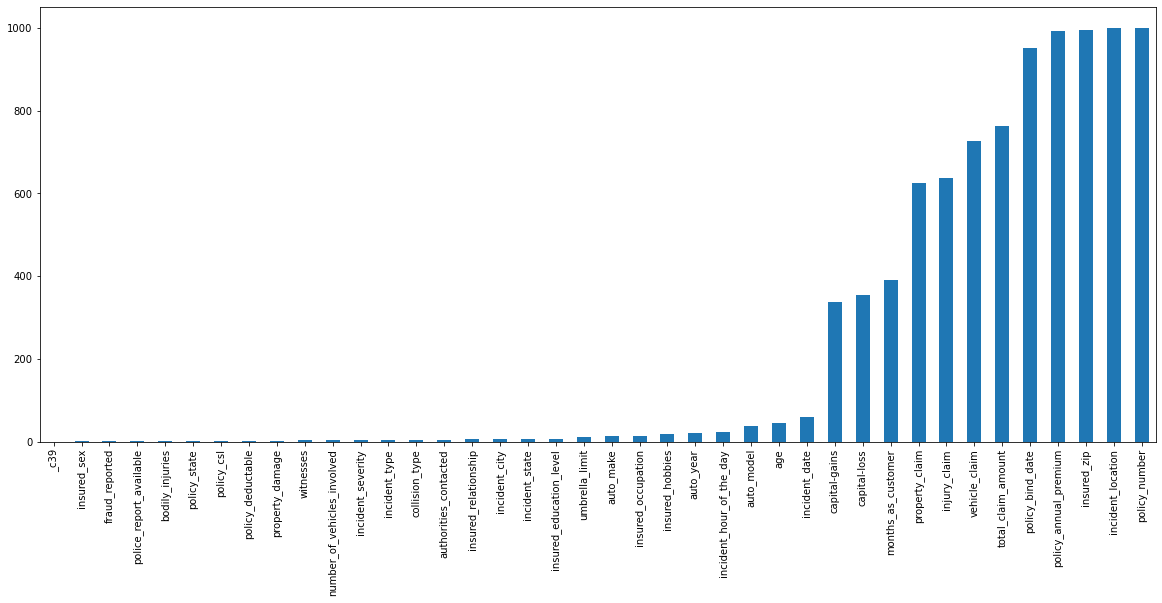

In [333]:
#checking unique in dataset
df.nunique().sort_values().plot.bar(figsize=(20,8))

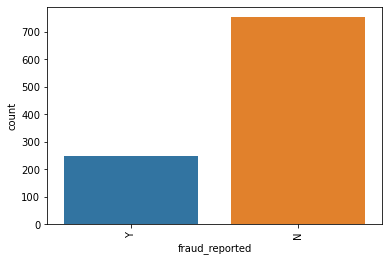

In [334]:
sns.countplot(df["fraud_reported"],data=df)
plt.xticks(rotation=90)
plt.show()

#### unbalanced column

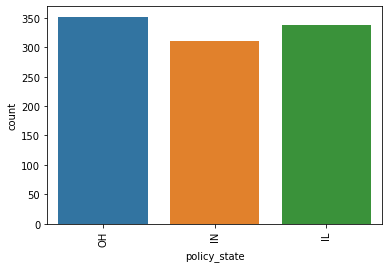

In [335]:
sns.countplot(df["policy_state"],data=df)
plt.xticks(rotation=90)
plt.show()

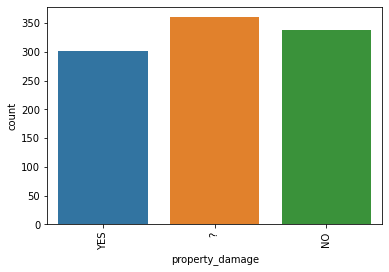

In [336]:
sns.countplot(df["property_damage"],data=df)
plt.xticks(rotation=90)
plt.show()

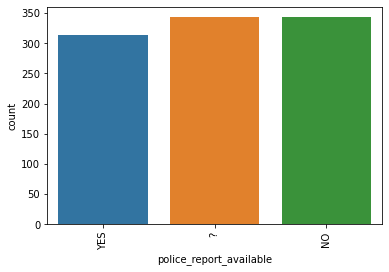

In [337]:
sns.countplot(df["police_report_available"],data=df)
plt.xticks(rotation=90)
plt.show()

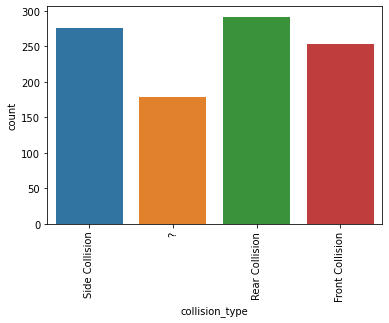

In [338]:
sns.countplot(df["collision_type"],data=df)
plt.xticks(rotation=90)
plt.show()

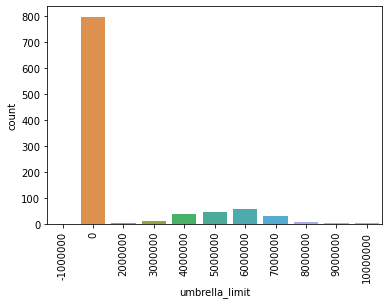

In [339]:
sns.countplot(df["umbrella_limit"],data=df)
plt.xticks(rotation=90)
plt.show()

In [340]:
#excluding object column
cont=df.select_dtypes(exclude="object").columns
cont

Index(['months_as_customer', 'age', 'policy_number', 'policy_deductable',
       'policy_annual_premium', 'umbrella_limit', 'insured_zip',
       'capital-gains', 'capital-loss', 'incident_hour_of_the_day',
       'number_of_vehicles_involved', 'bodily_injuries', 'witnesses',
       'total_claim_amount', 'injury_claim', 'property_claim', 'vehicle_claim',
       'auto_year', '_c39'],
      dtype='object')

<function matplotlib.pyplot.show(close=None, block=None)>

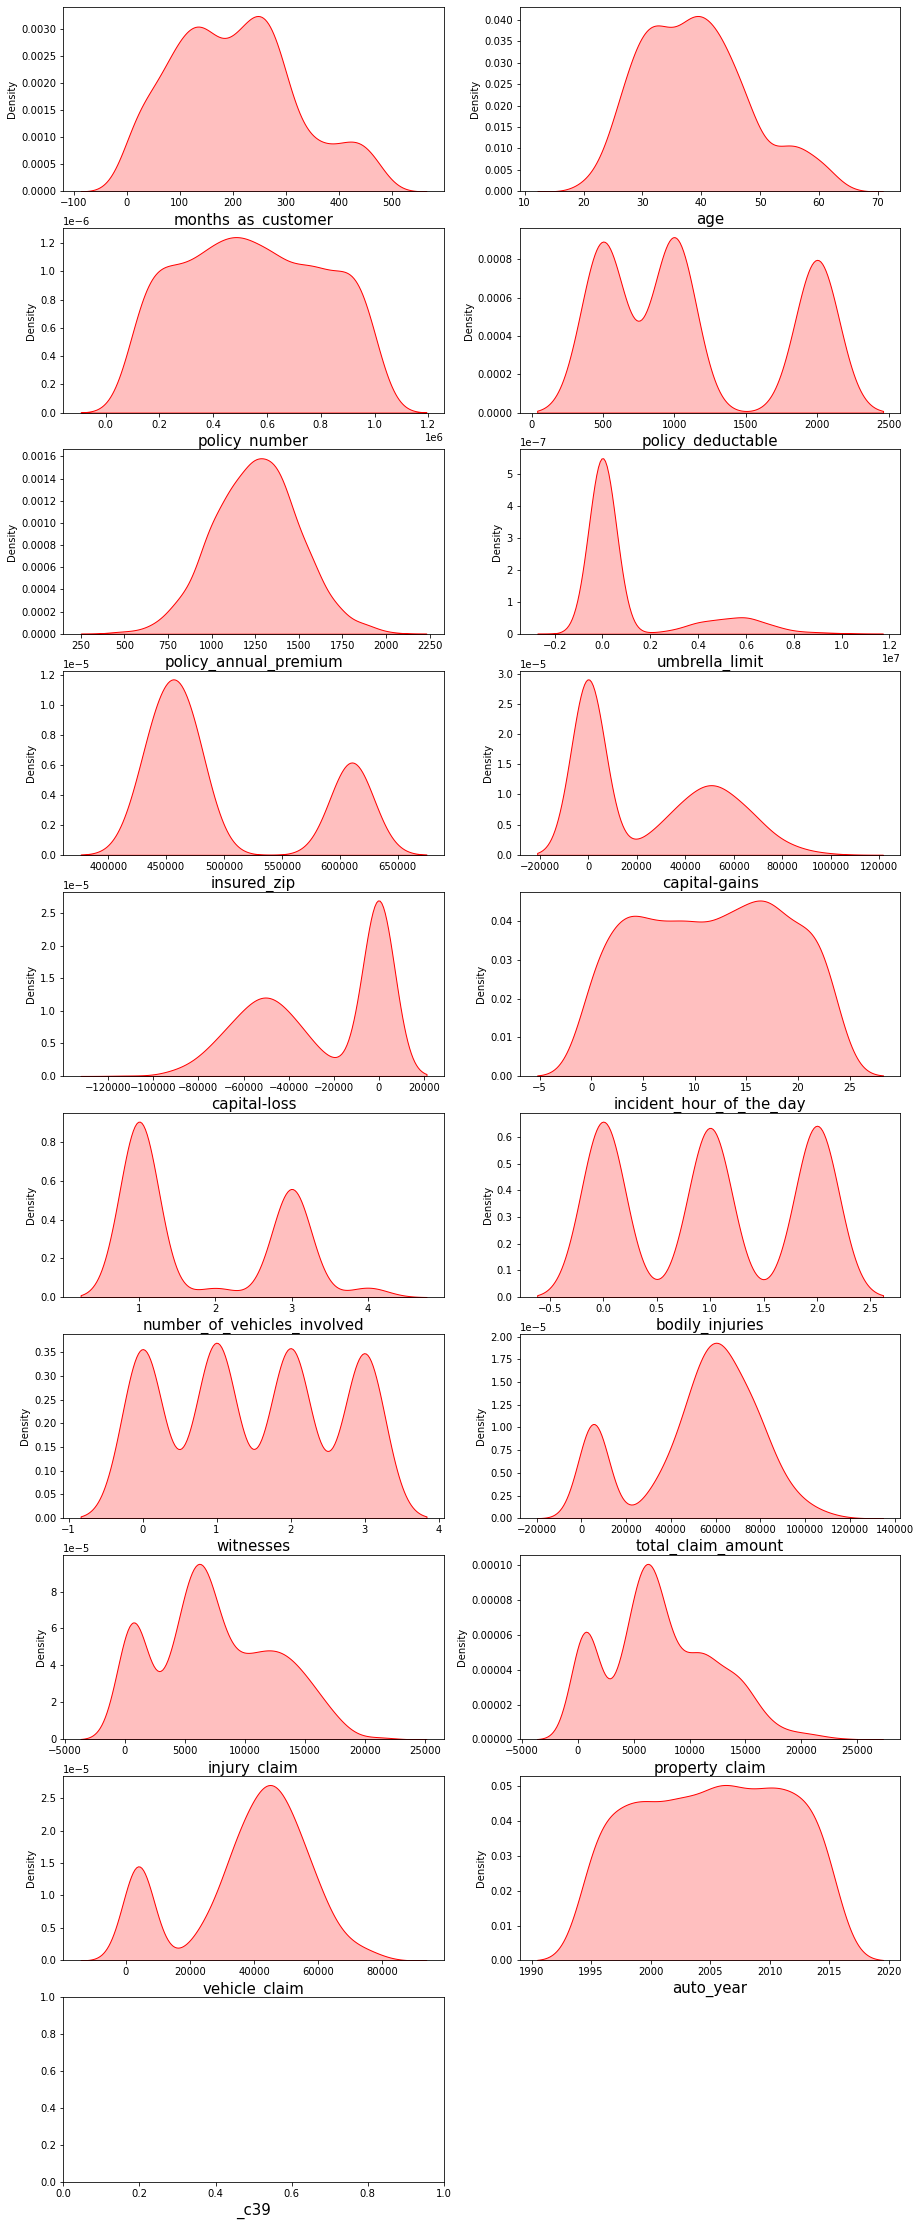

In [341]:
plotnumber=1
plt.figure(figsize=(15,40))
for i in df[cont]:
    if plotnumber < 20:
        ax=plt.subplot(10,2,plotnumber)
        sns.kdeplot(df[i],data=df,fill=True,color="r")
        plt.xlabel(i,fontsize=15)
        plotnumber+=1
plt.show

# feature engineering

In [342]:
df["policy_bind_date"]= pd.to_datetime(df["policy_bind_date"])
df["Date"]=df["policy_bind_date"].dt.day
df["Month"]=df["policy_bind_date"].dt.month
df["Year"]=df["policy_bind_date"].dt.year

In [343]:
df["incident_date"]= pd.to_datetime(df["incident_date"])
df["Incident_Date"]=df["incident_date"].dt.day
df["Incident_Month"]=df["incident_date"].dt.month

In [344]:
df

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,insured_sex,insured_education_level,insured_occupation,insured_hobbies,insured_relationship,capital-gains,capital-loss,incident_date,incident_type,collision_type,incident_severity,authorities_contacted,incident_state,incident_city,incident_location,incident_hour_of_the_day,number_of_vehicles_involved,property_damage,bodily_injuries,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,_c39,Date,Month,Year,Incident_Date,Incident_Month
0,328,48,521585,2014-10-17,OH,250/500,1000,1406.91,0,466132,MALE,MD,craft-repair,sleeping,husband,53300,0,2015-01-25,Single Vehicle Collision,Side Collision,Major Damage,Police,SC,Columbus,9935 4th Drive,5,1,YES,1,2,YES,71610,6510,13020,52080,Saab,92x,2004,Y,NaN,17,10,2014,25,1
1,228,42,342868,2006-06-27,IN,250/500,2000,1197.22,5000000,468176,MALE,MD,machine-op-inspct,reading,other-relative,0,0,2015-01-21,Vehicle Theft,?,Minor Damage,Police,VA,Riverwood,6608 MLK Hwy,8,1,?,0,0,?,5070,780,780,3510,Mercedes,E400,2007,Y,NaN,27,6,2006,21,1
2,134,29,687698,2000-06-09,OH,100/300,2000,1413.14,5000000,430632,FEMALE,PhD,sales,board-games,own-child,35100,0,2015-02-22,Multi-vehicle Collision,Rear Collision,Minor Damage,Police,NY,Columbus,7121 Francis Lane,7,3,NO,2,3,NO,34650,7700,3850,23100,Dodge,RAM,2007,N,NaN,9,6,2000,22,2
3,256,41,227811,1990-05-25,IL,250/500,2000,1415.74,6000000,608117,FEMALE,PhD,armed-forces,board-games,unmarried,48900,-62400,2015-10-01,Single Vehicle Collision,Front Collision,Major Damage,Police,OH,Arlington,6956 Maple Drive,5,1,?,1,2,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y,NaN,25,5,1990,1,10
4,228,44,367455,2014-06-06,IL,500/1000,1000,1583.91,6000000,610706,MALE,Associate,sales,board-games,unmarried,66000,-46000,2015-02-17,Vehicle Theft,?,Minor Damage,None,NY,Arlington,3041 3rd Ave,20,1,NO,0,1,NO,6500,1300,650,4550,Accura,RSX,2009,N,NaN,6,6,2014,17,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,3,38,941851,1991-07-16,OH,500/1000,1000,1310.80,0,431289,FEMALE,Masters,craft-repair,paintball,unmarried,0,0,2015-02-22,Single Vehicle Collision,Front Collision,Minor Damage,Fire,NC,Northbrook,6045 Andromedia St,20,1,YES,0,1,?,87200,17440,8720,61040,Honda,Accord,2006,N,NaN,16,7,1991,22,2
996,285,41,186934,2014-05-01,IL,100/300,1000,1436.79,0,608177,FEMALE,PhD,prof-specialty,sleeping,wife,70900,0,2015-01-24,Single Vehicle Collision,Rear Collision,Major Damage,Fire,SC,Northbend,3092 Texas Drive,23,1,YES,2,3,?,108480,18080,18080,72320,Volkswagen,Passat,2015,N,NaN,1,5,2014,24,1
997,130,34,918516,2003-02-17,OH,250/500,500,1383.49,3000000,442797,FEMALE,Masters,armed-forces,bungie-jumping,other-relative,35100,0,2015-01-23,Multi-vehicle Collision,Side Collision,Minor Damage,Police,NC,Arlington,7629 5th St,4,3,?,2,3,YES,67500,7500,7500,52500,Suburu,Impreza,1996,N,NaN,17,2,2003,23,1
998,458,62,533940,2011-11-18,IL,500/1000,2000,1356.92,5000000,441714,MALE,Associate,handlers-cleaners,base-jumping,wife,0,0,2015-02-26,Single Vehicle Collision,Rear Collision,Major Damage,Other,NY,Arlington,6128 Elm Lane,2,1,?,0,1,YES,46980,5220,5220,36540,Audi,A5,1998,N,NaN,18,11,2011,26,2


In [345]:
policy_csl= list(df["policy_csl"])

In [346]:
csl1=[]
csl2=[]
for i in range(len(policy_csl)):
    csl1.append(policy_csl[i].split(sep="/")[0])
    csl2.append(policy_csl[i].split(sep='/')[-1])

In [347]:
df["csl1"]=csl1
df["csl2"]=csl2

In [348]:
df.drop(["policy_csl","policy_bind_date","incident_date"],inplace=True,axis=1)

In [349]:

df["police_report_available"]=df["property_damage"].replace("?","No info")
df["collision_type"]=df["collision_type"].replace("?",df["collision_type"].mode()[0])


In [350]:
#replacing ? with no info
df["property_damage"]=df["property_damage"].replace("?","No info")

In [352]:
# for converting categorical to numerical
from sklearn.preprocessing import LabelEncoder

In [353]:
label=LabelEncoder()
for i in df:
    if df[i].dtype=="object":
        df[i]=label.fit_transform(df[i])
        
df

,months_as_customer,age,policy_number,policy_state,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,insured_sex,insured_education_level,insured_occupation,insured_hobbies,insured_relationship,capital-gains,capital-loss,incident_type,collision_type,incident_severity,authorities_contacted,incident_state,incident_city,incident_location,incident_hour_of_the_day,number_of_vehicles_involved,property_damage,bodily_injuries,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,_c39,Date,Month,Year,Incident_Date,Incident_Month,csl1,csl2
0,328,48,521585,2,1000,1406.91,0,466132,1,4,2,17,0,53300,0,2,2,0,4,4,1,996,5,1,2,1,2,2,71610,6510,13020,52080,10,1,2004,1,NaN,17,10,2014,25,1,1,2
1,228,42,342868,1,2000,1197.22,5000000,468176,1,4,6,15,2,0,0,3,1,1,4,5,5,628,8,1,1,0,0,1,5070,780,780,3510,8,12,2007,1,NaN,27,6,2006,21,1,1,2
2,134,29,687698,2,2000,1413.14,5000000,430632,0,6,11,2,3,35100,0,0,1,1,4,1,1,685,7,3,0,2,3,0,34650,7700,3850,23100,4,30,2007,0,NaN,9,6,2000,22,2,0,1
3,256,41,227811,0,2000,1415.74,6000000,608117,0,6,1,2,4,48900,-62400,2,0,0,4,2,0,669,5,1,1,1,2,1,63400,6340,6340,50720,3,34,2014,1,NaN,25,5,1990,1,10,1,2
4,228,44,367455,0,1000,1583.91,6000000,610706,1,0,11,2,4,66000,-46000,3,1,1,2,1,0,220,20,1,0,0,1,0,6500,1300,650,4550,0,31,2009,0,NaN,6,6,2014,17,2,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,3,38,941851,2,1000,1310.80,0,431289,0,5,2,13,4,0,0,2,0,1,1,0,4,561,20,1,2,0,1,2,87200,17440,8720,61040,6,6,2006,0,NaN,16,7,1991,22,2,2,0
996,285,41,186934,0,1000,1436.79,0,608177,0,6,9,17,5,70900,0,2,1,0,1,4,3,227,23,1,2,2,3,2,108480,18080,18080,72320,13,28,2015,0,NaN,1,5,2014,24,1,0,1
997,130,34,918516,2,500,1383.49,3000000,442797,0,5,1,3,2,35100,0,0,2,1,4,0,0,746,4,3,1,2,3,1,67500,7500,7500,52500,11,19,1996,0,NaN,17,2,2003,23,1,1,2
998,458,62,533940,0,2000,1356.92,5000000,441714,1,0,5,0,5,0,0,2,1,0,3,1,0,569,2,1,1,0,1,1,46980,5220,5220,36540,1,5,1998,0,NaN,18,11,2011,26,2,2,0


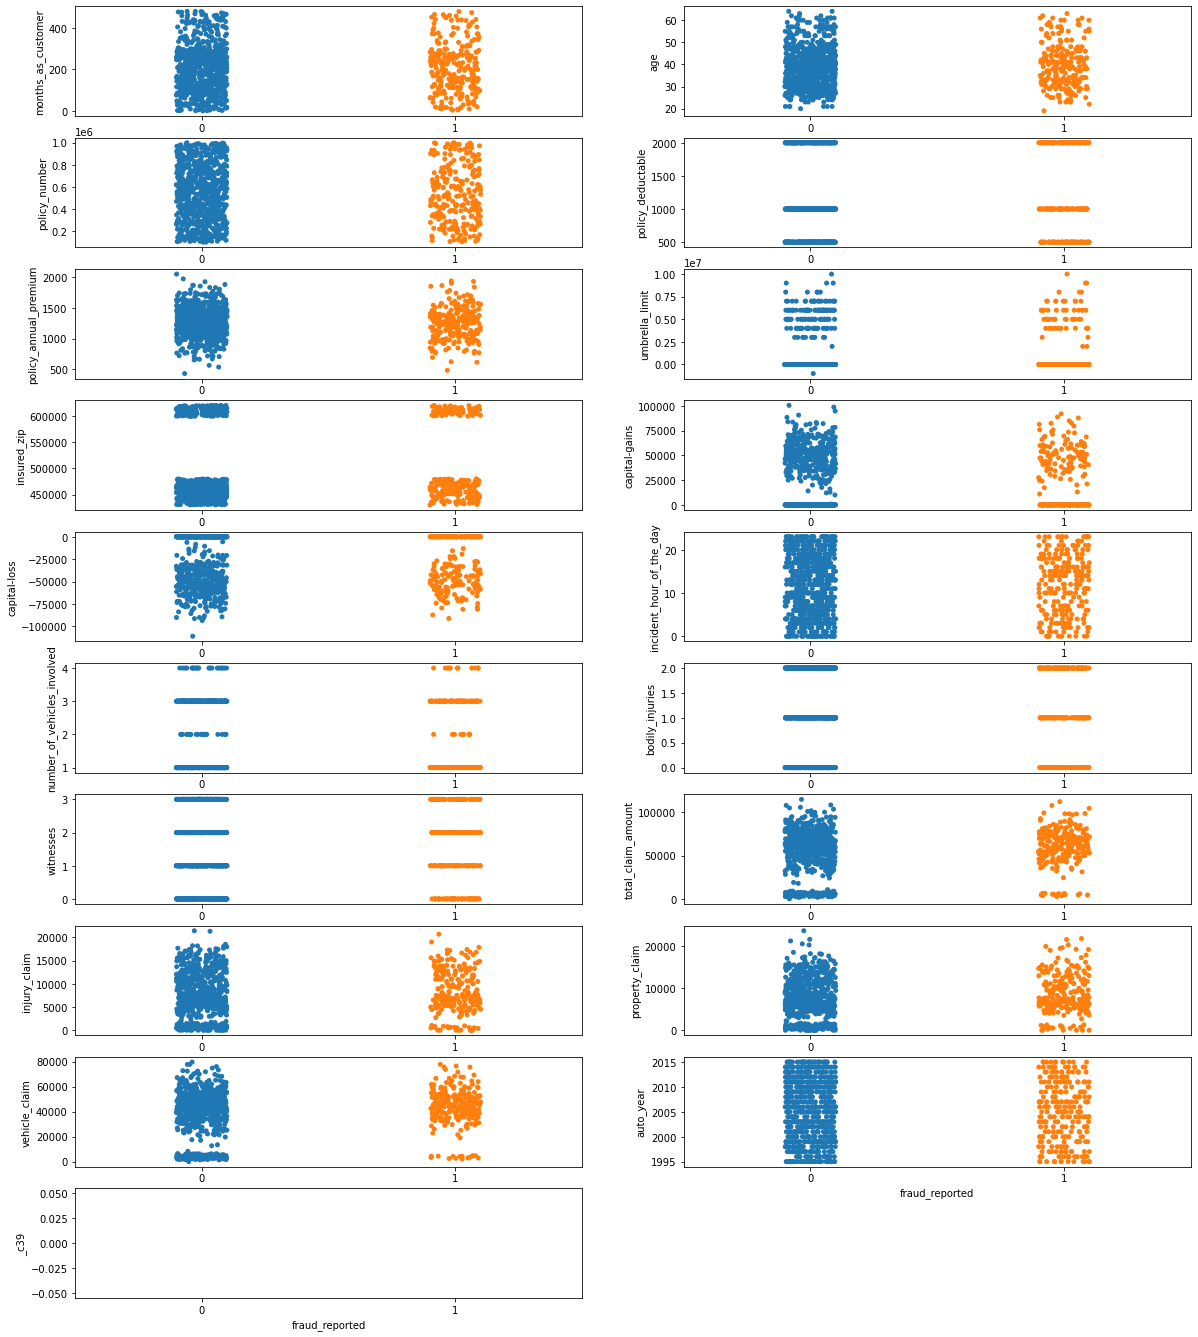

In [354]:
#bivariate analysis
plt.figure(figsize=(20,60))
plotnumber=1
for i in df[cont]:
    if plotnumber < 50:
        ax= plt.subplot(25,2,plotnumber)
        sns.stripplot(x=df["fraud_reported"],y=df[i])
        plt.ylabel(i,fontsize=10)
        plotnumber+=1
plt.show()

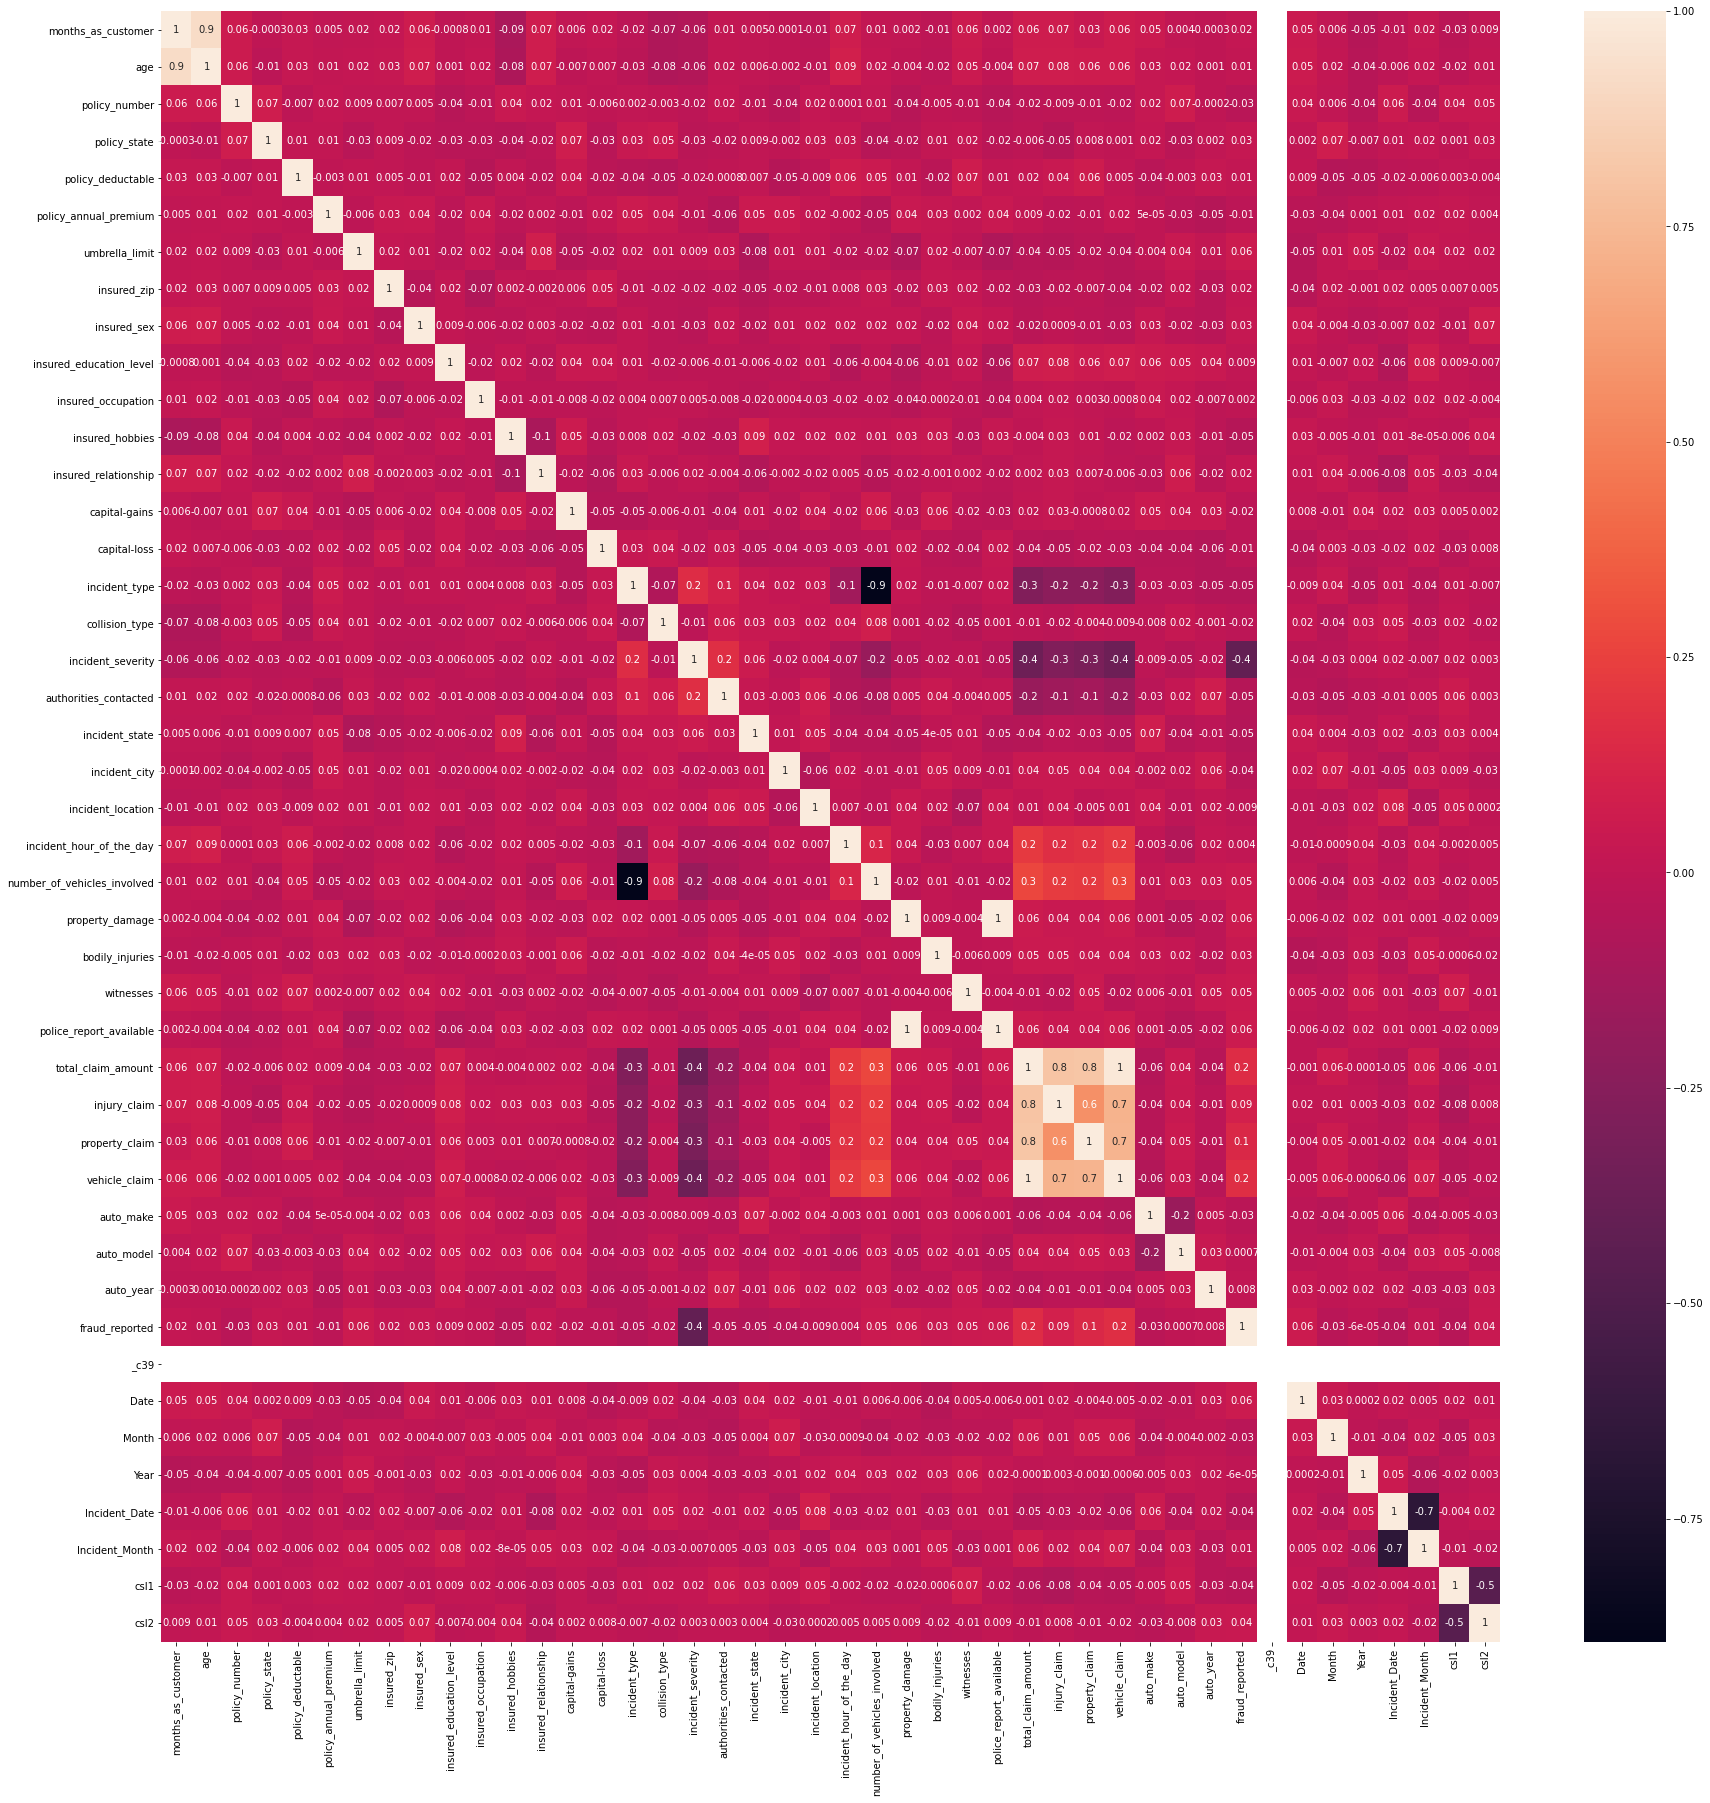

In [355]:
#multivariate analysis
plt.figure(figsize = (30,30))
sns.heatmap(df.corr(),annot = True,fmt="0.1g")
plt.show()

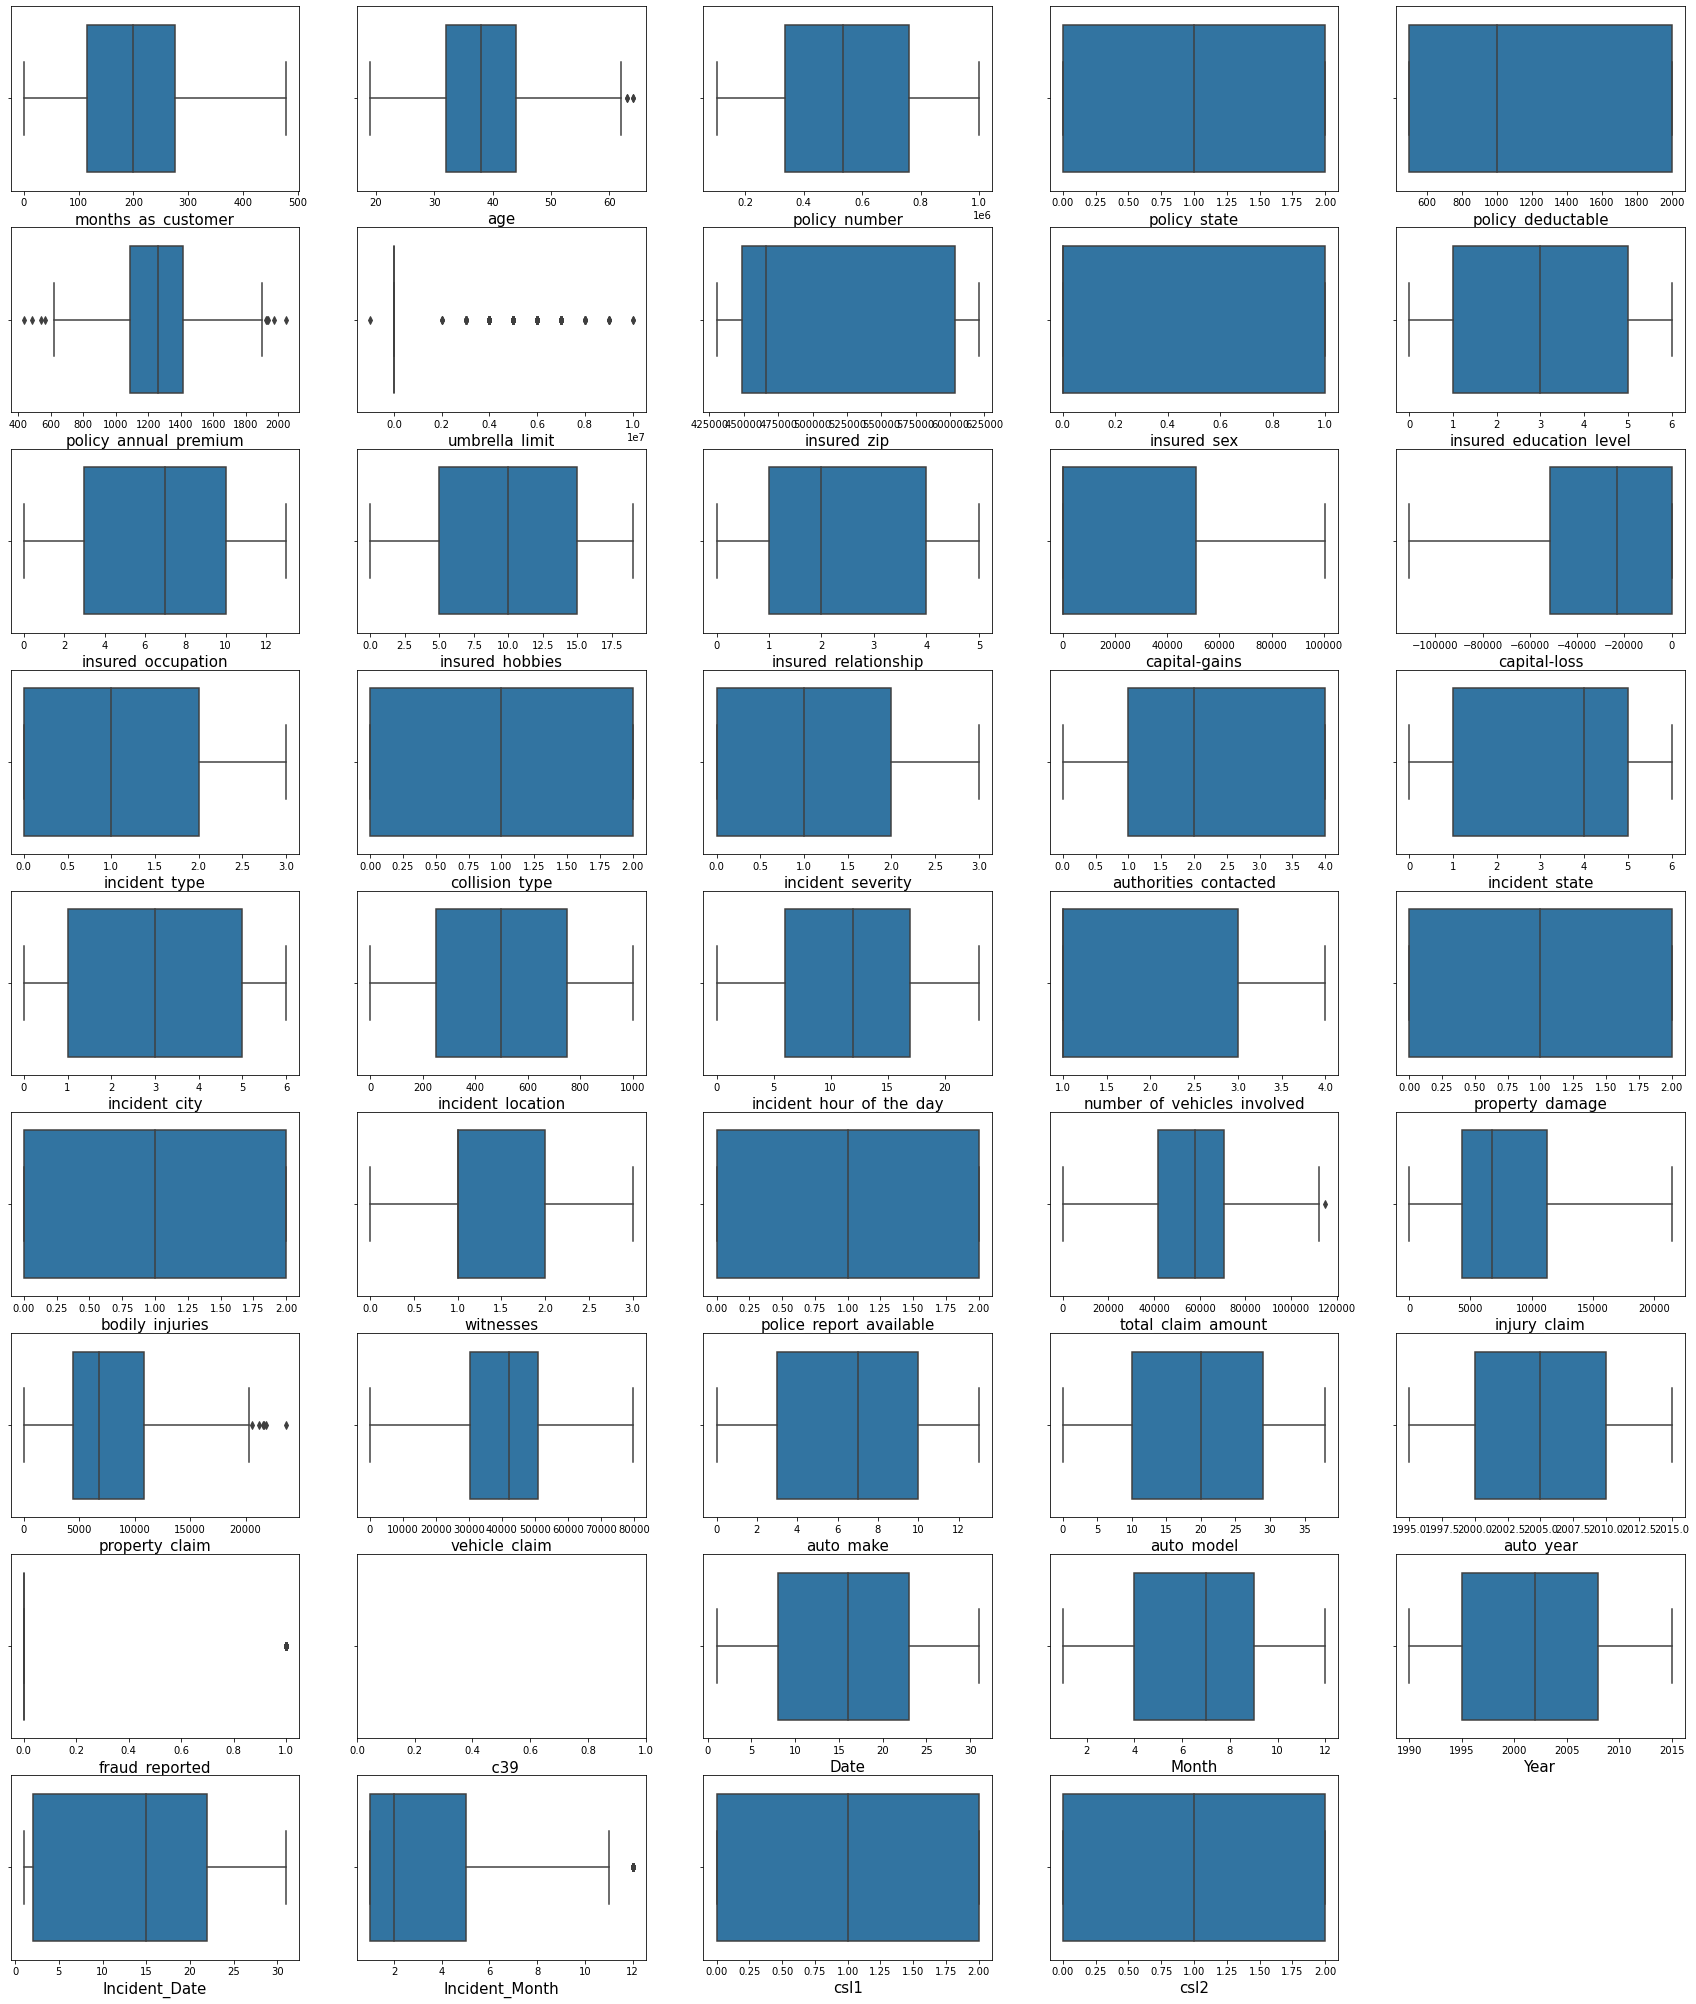

In [356]:
#using box plot to see outliers in the dataset
plt.figure(figsize=(30,40))
plotnumber = 1
for column in df:
    if plotnumber<=50:
        ax=plt.subplot(10,5,plotnumber)
        sns.boxplot(df[column])
        plt.xlabel(column,fontsize=15)
    plotnumber+=1
plt.show()

In [ ]:
umbrella limit ,propertyclaim and policy annual income have outlier in it

In [357]:
#droping unwanted column
df.drop("_c39",axis=1,inplace=True)

In [358]:
# for removing outliers
from scipy.stats import zscore

In [359]:
zscr=zscore(df[["umbrella_limit","property_claim","policy_annual_premium"]])
abs_score=np.abs(zscr)

In [360]:
filter=((abs_score<3) & (abs_score>-3)).all (axis=1)

In [361]:
new_df=df[filter]

In [362]:
new_df.shape

(981, 43)

In [363]:
#interquantile
q1=new_df.quantile(0.25)
q3=new_df.quantile(0.75)
iqr=q3-q1

In [364]:
upper=q3["property_claim"]+(1.5*iqr["property_claim"])
index=np.where(new_df["property_claim"]>upper)
new_df.drop(new_df.index[index],inplace=True)

In [365]:
upper=q3["policy_annual_premium"]+(1.5*iqr["policy_annual_premium"])
index=np.where(new_df["policy_annual_premium"]>upper)
new_df.drop(new_df.index[index],inplace=True)

In [366]:
inner=q1["policy_annual_premium"]-(1.5*iqr["policy_annual_premium"])
index=np.where(new_df["policy_annual_premium"]<inner)
new_df.drop(new_df.index[index],inplace=True)

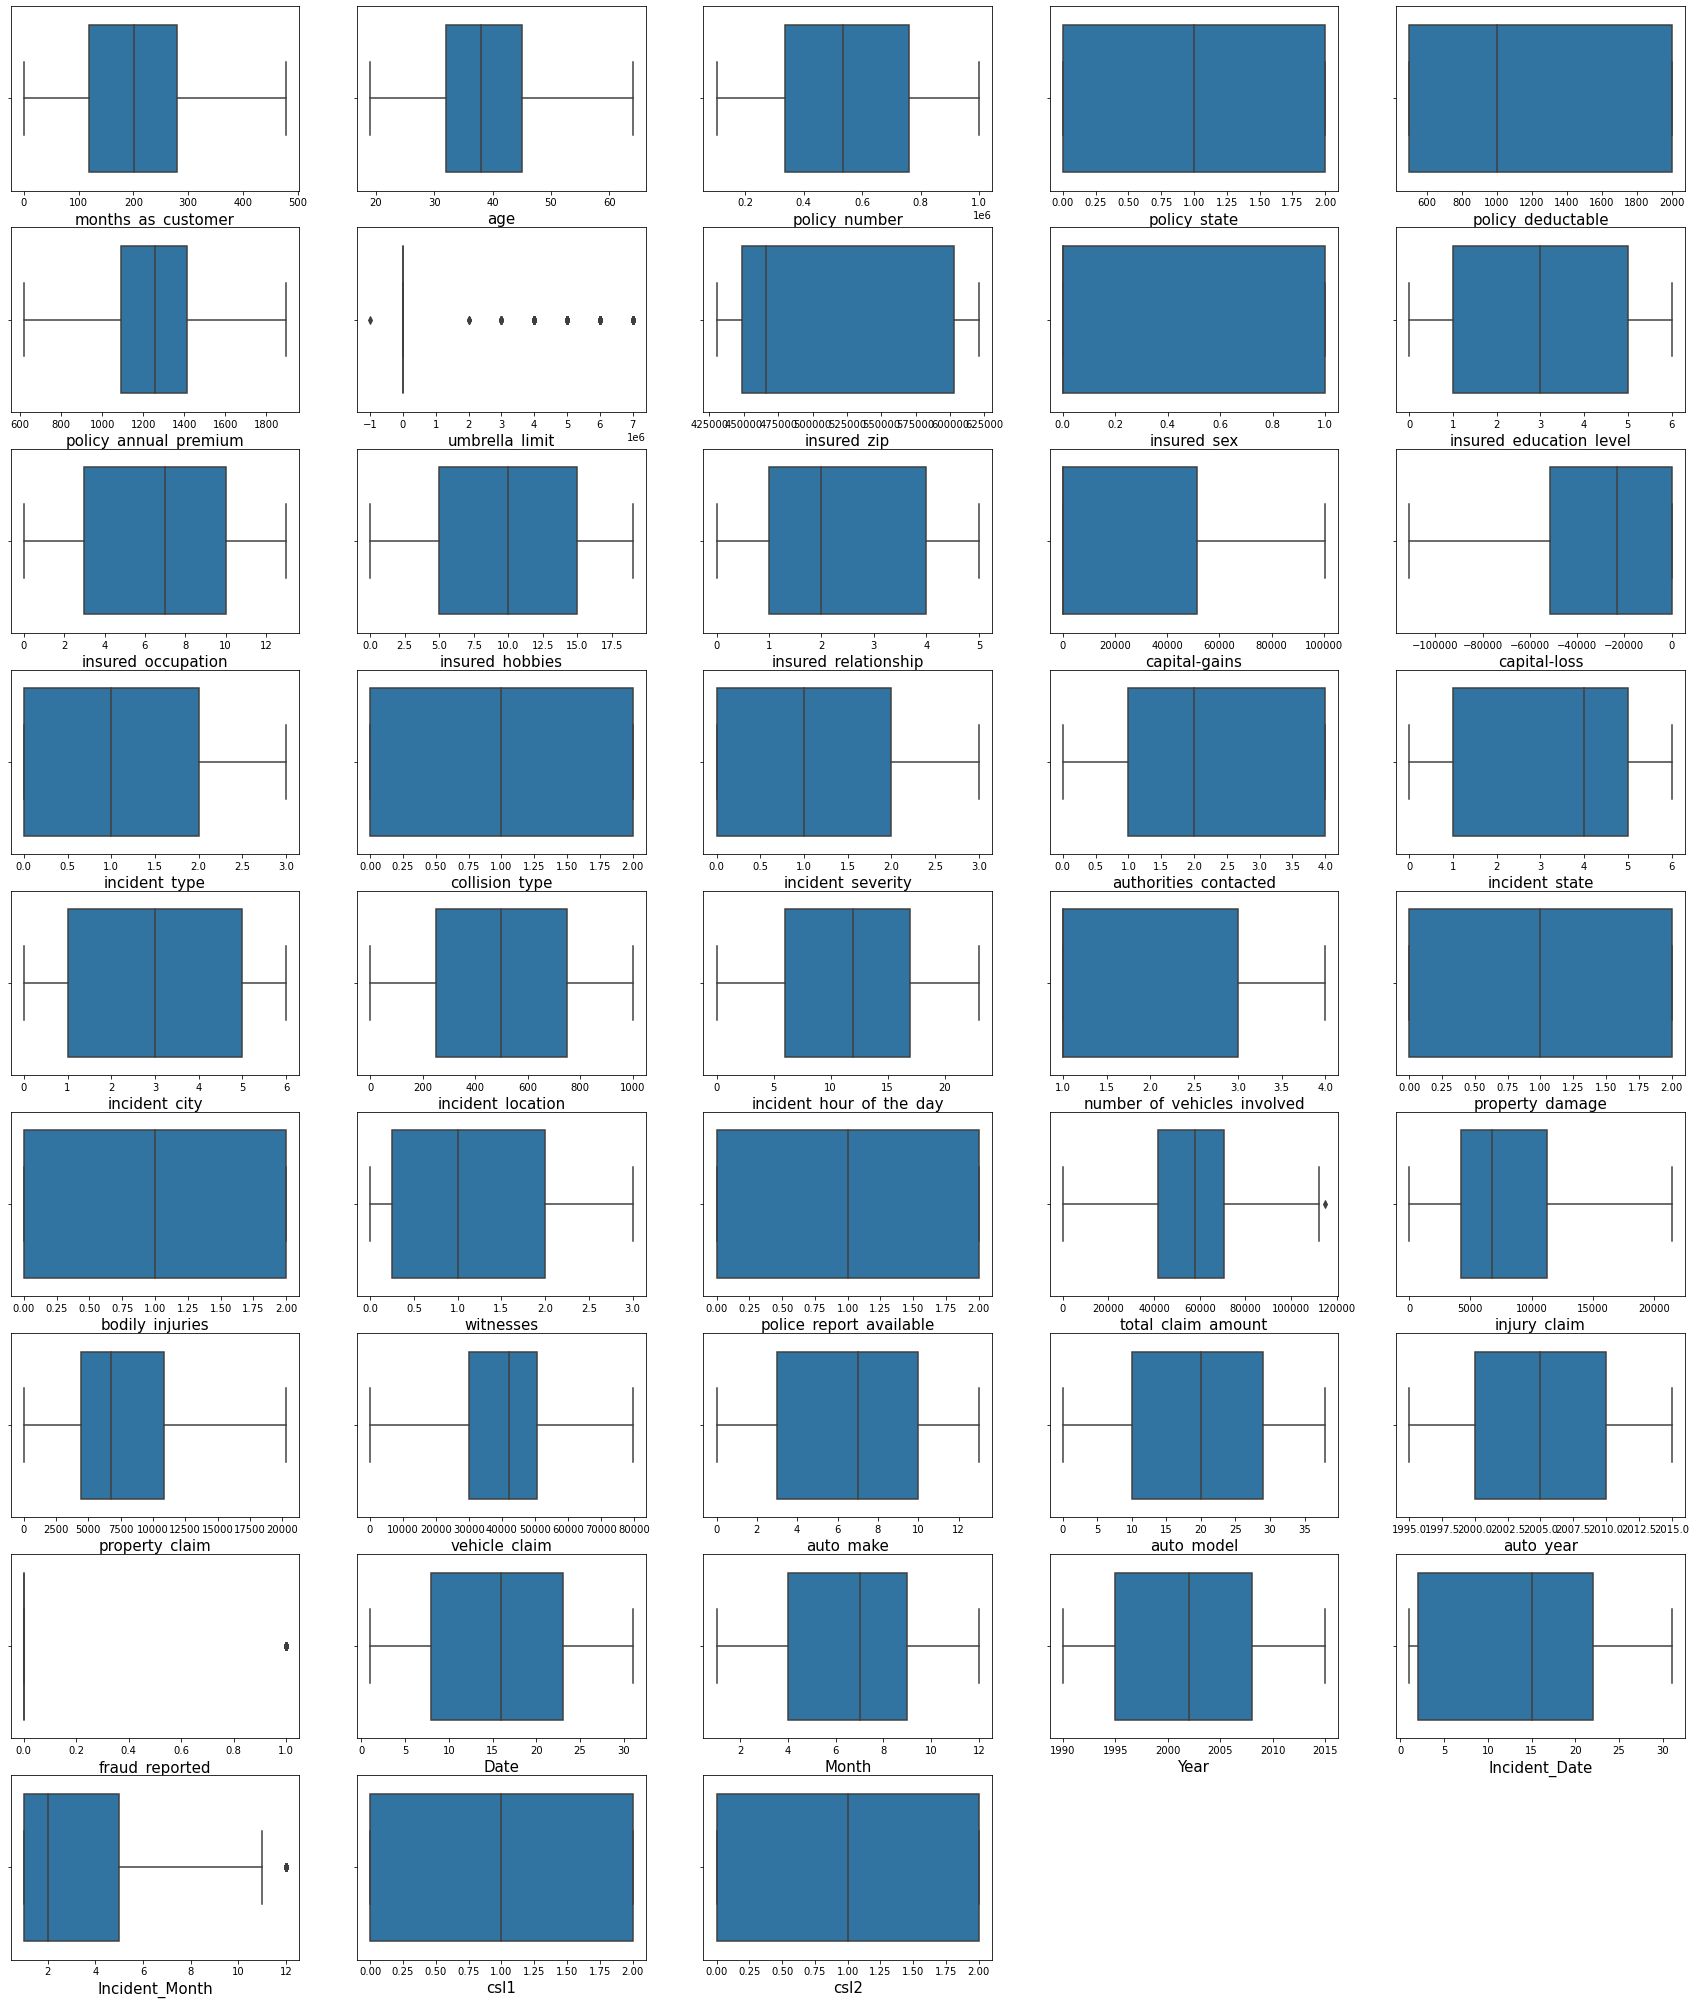

In [367]:
#using box plot to see outliers in the dataset
plt.figure(figsize=(30,40))
plotnumber = 1
for column in new_df:
    if plotnumber<=50:
        ax=plt.subplot(10,5,plotnumber)
        sns.boxplot(new_df[column])
        plt.xlabel(column,fontsize=15)
    plotnumber+=1
plt.show()

In [368]:
#final dataset shape
new_df.shape

(970, 43)

In [369]:
#checking skewness
new_df.skew()

months_as_customer             0.357023
age                            0.469551
policy_number                  0.038707
policy_state                  -0.046231
policy_deductable              0.470683
policy_annual_premium          0.005538
umbrella_limit                 1.811775
insured_zip                    0.848563
insured_sex                    0.144931
insured_education_level        0.008319
insured_occupation            -0.055653
insured_hobbies               -0.045402
insured_relationship           0.075817
capital-gains                  0.466008
capital-loss                  -0.391918
incident_type                  0.095870
collision_type                -0.031562
incident_severity              0.280591
authorities_contacted         -0.111615
incident_state                -0.145964
incident_city                  0.041315
incident_location             -0.000585
incident_hour_of_the_day      -0.033070
number_of_vehicles_involved    0.503605
property_damage                0.063166


In [370]:
# for skewness removal 
from sklearn.preprocessing import PowerTransformer
scale=PowerTransformer(method="yeo-johnson")

In [371]:
new_df[["total_claim_amount","vehicle_claim"]]=scale.fit_transform(new_df[["total_claim_amount","vehicle_claim"]].values)
new_df

,months_as_customer,age,policy_number,policy_state,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,insured_sex,insured_education_level,insured_occupation,insured_hobbies,insured_relationship,capital-gains,capital-loss,incident_type,collision_type,incident_severity,authorities_contacted,incident_state,incident_city,incident_location,incident_hour_of_the_day,number_of_vehicles_involved,property_damage,bodily_injuries,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,Date,Month,Year,Incident_Date,Incident_Month,csl1,csl2
0,328,48,521585,2,1000,1406.91,0,466132,1,4,2,17,0,53300,0,2,2,0,4,4,1,996,5,1,2,1,2,2,0.729486,6510,13020,0.765058,10,1,2004,1,17,10,2014,25,1,1,2
1,228,42,342868,1,2000,1197.22,5000000,468176,1,4,6,15,2,0,0,3,1,1,4,5,5,628,8,1,1,0,0,1,-1.776940,780,780,-1.785659,8,12,2007,1,27,6,2006,21,1,1,2
2,134,29,687698,2,2000,1413.14,5000000,430632,0,6,11,2,3,35100,0,0,1,1,4,1,1,685,7,3,0,2,3,0,-0.714725,7700,3850,-0.818084,4,30,2007,0,9,6,2000,22,2,0,1
3,256,41,227811,0,2000,1415.74,6000000,608117,0,6,1,2,4,48900,-62400,2,0,0,4,2,0,669,5,1,1,1,2,1,0.402067,6340,6340,0.688468,3,34,2014,1,25,5,1990,1,10,1,2
4,228,44,367455,0,1000,1583.91,6000000,610706,1,0,11,2,4,66000,-46000,3,1,1,2,1,0,220,20,1,0,0,1,0,-1.729983,1300,650,-1.739144,0,31,2009,0,6,6,2014,17,2,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,3,38,941851,2,1000,1310.80,0,431289,0,5,2,13,4,0,0,2,0,1,1,0,4,561,20,1,2,0,1,2,1.359208,17440,8720,1.273994,6,6,2006,0,16,7,1991,22,2,2,0
996,285,41,186934,0,1000,1436.79,0,608177,0,6,9,17,5,70900,0,2,1,0,1,4,3,227,23,1,2,2,3,2,2.233044,18080,18080,1.924308,13,28,2015,0,1,5,2014,24,1,0,1
997,130,34,918516,2,500,1383.49,3000000,442797,0,5,1,3,2,35100,0,0,2,1,4,0,0,746,4,3,1,2,3,1,0.565184,7500,7500,0.788748,11,19,1996,0,17,2,2003,23,1,1,2
998,458,62,533940,0,2000,1356.92,5000000,441714,1,0,5,0,5,0,0,2,1,0,3,1,0,569,2,1,1,0,1,1,-0.242282,5220,5220,-0.098064,1,5,1998,0,18,11,2011,26,2,2,0


In [372]:
new_df.skew()

months_as_customer             0.357023
age                            0.469551
policy_number                  0.038707
policy_state                  -0.046231
policy_deductable              0.470683
policy_annual_premium          0.005538
umbrella_limit                 1.811775
insured_zip                    0.848563
insured_sex                    0.144931
insured_education_level        0.008319
insured_occupation            -0.055653
insured_hobbies               -0.045402
insured_relationship           0.075817
capital-gains                  0.466008
capital-loss                  -0.391918
incident_type                  0.095870
collision_type                -0.031562
incident_severity              0.280591
authorities_contacted         -0.111615
incident_state                -0.145964
incident_city                  0.041315
incident_location             -0.000585
incident_hour_of_the_day      -0.033070
number_of_vehicles_involved    0.503605
property_damage                0.063166


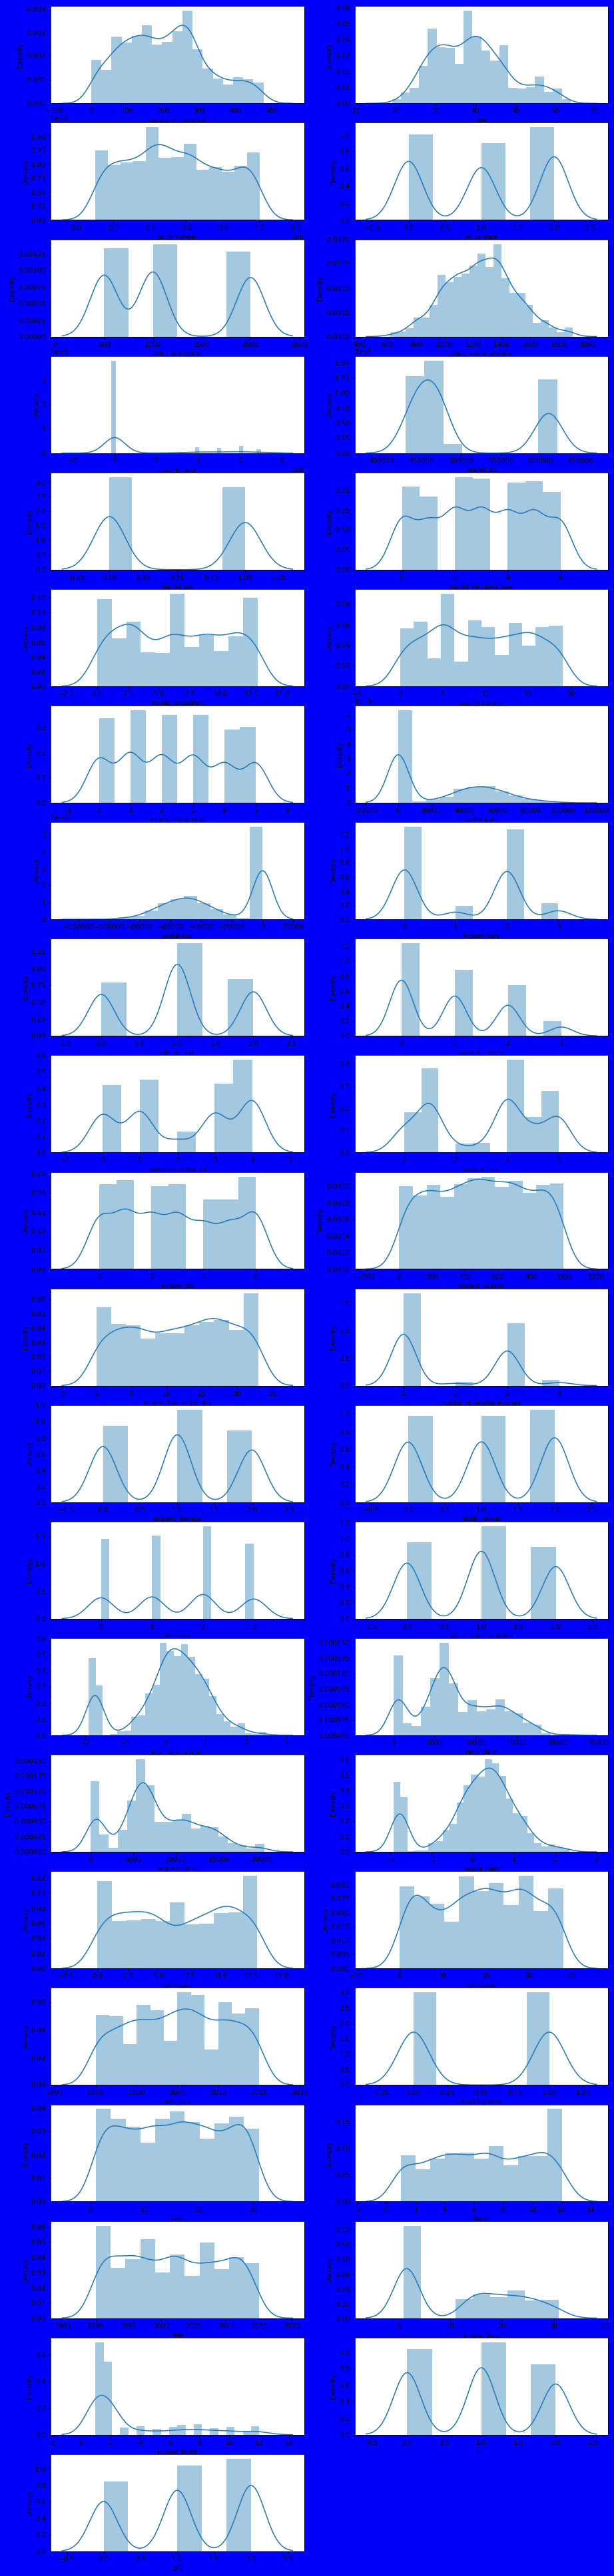

In [525]:
#for checking skewness
plt.figure(figsize=(15,80),facecolor='blue')
plotnumber = 1
for column in new_df:
    if plotnumber<=50:
        ax=plt.subplot(25,2,plotnumber)
        sns.distplot(new_df[column])
        plt.xlabel(column,fontsize=8)
    plotnumber+=1
plt.show()

<AxesSubplot:>

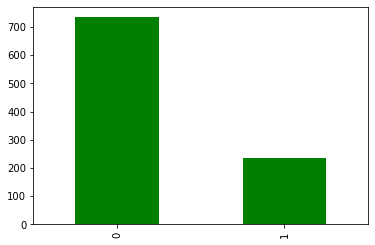

In [373]:
#dataset unbalance
new_df.fraud_reported.value_counts().plot.bar(color='green')

In [374]:
#for balancing dataset
from sklearn.utils import resample

In [375]:
z=new_df[new_df.fraud_reported==0]
a=new_df[new_df.fraud_reported==1]

In [376]:
up=resample(a,replace=True,n_samples=len(z),random_state=0)

In [377]:
new_df=pd.concat([z,up])
new_df

,months_as_customer,age,policy_number,policy_state,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,insured_sex,insured_education_level,insured_occupation,insured_hobbies,insured_relationship,capital-gains,capital-loss,incident_type,collision_type,incident_severity,authorities_contacted,incident_state,incident_city,incident_location,incident_hour_of_the_day,number_of_vehicles_involved,property_damage,bodily_injuries,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,Date,Month,Year,Incident_Date,Incident_Month,csl1,csl2
2,134,29,687698,2,2000,1413.14,5000000,430632,0,6,11,2,3,35100,0,0,1,1,4,1,1,685,7,3,0,2,3,0,-0.714725,7700,3850,-0.818084,4,30,2007,0,9,6,2000,22,2,0,1
4,228,44,367455,0,1000,1583.91,6000000,610706,1,0,11,2,4,66000,-46000,3,1,1,2,1,0,220,20,1,0,0,1,0,-1.729983,1300,650,-1.739144,0,31,2009,0,6,6,2014,17,2,2,0
6,137,34,413978,1,1000,1333.35,0,441716,1,6,9,2,0,0,-77000,0,0,1,4,1,6,539,0,3,1,0,0,1,1.012635,21450,7150,0.650804,9,29,2012,0,6,4,2000,13,1,1,2
7,165,37,429027,0,1000,1137.03,0,603195,1,0,12,0,4,0,0,0,0,2,4,5,1,276,23,3,1,2,2,1,-0.062945,9380,9380,-0.299689,1,5,2015,0,2,3,1990,27,2,0,1
8,27,33,485665,0,500,1442.99,0,601734,0,6,7,9,3,0,0,2,0,2,4,6,0,429,21,1,0,1,1,0,-0.975447,2770,2770,-0.867237,12,9,2012,0,2,5,1997,30,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
972,232,44,221854,2,2000,1181.64,0,454552,1,1,7,8,5,25800,0,2,1,0,1,1,3,28,22,1,1,1,1,1,0.086236,5540,11080,0.024584,7,17,2002,1,10,3,1994,2,8,1,2
926,211,38,752504,1,1000,1055.09,0,433250,0,5,13,18,3,0,0,2,0,2,1,1,1,223,12,1,1,0,3,1,1.535361,8320,16640,1.590988,2,38,2005,1,15,5,1997,27,1,1,2
365,162,31,386690,1,1000,1050.24,0,456789,0,5,0,5,5,30700,0,1,1,1,2,0,0,496,7,1,1,0,0,1,-1.824114,360,720,-1.828785,2,37,2013,1,21,2,2006,26,2,0,1
649,16,32,307469,0,1000,968.46,0,615767,1,4,12,5,1,50800,-66200,0,2,2,0,6,1,84,0,3,1,0,2,1,0.243731,6600,13200,0.069645,4,30,1995,1,28,7,2002,27,1,0,1


<AxesSubplot:>

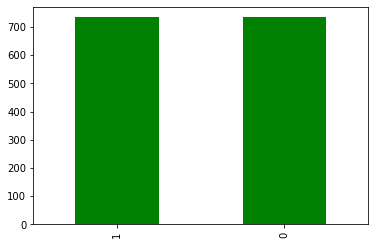

In [378]:
#dataset balance
new_df.fraud_reported.value_counts().plot.bar(color='green')

In [380]:
#splitting dataset
x=new_df.drop(columns=['fraud_reported'],axis=1)
y=new_df["fraud_reported"]

In [381]:
#for selecting best column
from sklearn.feature_selection import chi2,SelectPercentile,f_classif,SelectKBest
s=SelectKBest(score_func=f_classif,k=20)
f_values=s.fit(x,y)

In [382]:
df_values=pd.DataFrame(x.columns)

In [383]:
df_score=pd.DataFrame(f_values.scores_)

In [384]:
feature_score=pd.concat([df_values,df_score],axis=1)

In [385]:
feature_score.columns=["col","score"]

In [386]:
feature_score.sort_values(by="score")

,col,score
32,auto_make,0.000651
34,auto_year,0.000700
12,insured_relationship,0.061813
39,Incident_Month,0.076156
33,auto_model,0.091638
1,age,0.092329
16,collision_type,0.151329
21,incident_location,0.262530
0,months_as_customer,0.308912
36,Month,0.369048


In [391]:
#selecting best column on the basis of KBest
x=new_df[["incident_severity","vehicle_claim","total_claim_amount","property_claim","injury_claim","insured_hobbies","csl2","incident_state","number_of_vehicles_involved","Incident_Date","incident_type","capital-gains","police_report_available","property_damage","bodily_injuries","Date"]]

In [392]:
x.columns

Index(['incident_severity', 'vehicle_claim', 'total_claim_amount',
       'property_claim', 'injury_claim', 'insured_hobbies', 'csl2',
       'incident_state', 'number_of_vehicles_involved', 'Incident_Date',
       'incident_type', 'capital-gains', 'police_report_available',
       'property_damage', 'bodily_injuries', 'Date'],
      dtype='object')

# model building

In [393]:
from sklearn.model_selection import train_test_split,GridSearchCV,cross_val_score,KFold
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report,accuracy_score,confusion_matrix
from sklearn.ensemble import GradientBoostingClassifier,BaggingClassifier,RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.decomposition import PCA
from xgboost import XGBClassifier

In [394]:
# scaling dataset
scale=StandardScaler()
x_scaled=scale.fit_transform(x)

In [395]:
x_train,x_test,y_train,y_test=train_test_split(x_scaled,y,test_size=0.25,random_state=140)

# RandomForestClassifier

In [396]:
clf = RandomForestClassifier()
clf.fit(x_train,y_train)

RandomForestClassifier()

In [397]:
y_pred = clf.predict(x_test)

In [398]:
print("\nClassification report :\n",classification_report(y_test,y_pred))


Classification report :
               precision    recall  f1-score   support

           0       0.98      0.88      0.93       176
           1       0.90      0.98      0.94       191

    accuracy                           0.93       367
   macro avg       0.94      0.93      0.93       367
weighted avg       0.94      0.93      0.93       367



In [399]:
accuracy_score(y_test,y_pred)

0.9346049046321526

In [400]:
cross_val_score(clf,x_scaled,y,cv=5).mean()

0.9128276566599336

In [401]:
rf_conf_mat = confusion_matrix(y_test,y_pred)
print('confusion_matrix ===>\n',rf_conf_mat)

confusion_matrix ===>
 [[155  21]
 [  3 188]]


# BaggingClassifier

In [402]:
bg = BaggingClassifier()
bg.fit(x_train,y_train)

BaggingClassifier()

In [403]:
y_pred = bg.predict(x_test)

In [404]:
print("\nClassification report :\n",classification_report(y_test,y_pred))


Classification report :
               precision    recall  f1-score   support

           0       0.97      0.86      0.92       176
           1       0.89      0.98      0.93       191

    accuracy                           0.92       367
   macro avg       0.93      0.92      0.92       367
weighted avg       0.93      0.92      0.92       367



In [405]:
accuracy_score(y_test,y_pred)

0.9237057220708447

In [406]:
cross_val_score(bg,x_scaled,y,cv=5).mean()

0.9114601471988113

In [407]:
rf_conf_mat = confusion_matrix(y_test,y_pred)
print('confusion_matrix ===>\n',rf_conf_mat)

confusion_matrix ===>
 [[152  24]
 [  4 187]]


# GradientBoostingClassifier

In [408]:
gd= GradientBoostingClassifier()
gd.fit(x_train,y_train)

GradientBoostingClassifier()

In [409]:
y_pred = gd.predict(x_test)

In [410]:
print("\nClassification report :\n",classification_report(y_test,y_pred))


Classification report :
               precision    recall  f1-score   support

           0       0.90      0.86      0.88       176
           1       0.87      0.91      0.89       191

    accuracy                           0.89       367
   macro avg       0.89      0.88      0.89       367
weighted avg       0.89      0.89      0.89       367



In [411]:
accuracy_score(y_test,y_pred)

0.885558583106267

In [412]:
cross_val_score(gd,x_scaled,y,cv=5).mean()

0.880810754335864

In [413]:
rf_conf_mat = confusion_matrix(y_test,y_pred)
print('confusion_matrix ===>\n',rf_conf_mat)

confusion_matrix ===>
 [[151  25]
 [ 17 174]]


# XGBClassifier

In [472]:
xg= XGBClassifier(verbosity=0)
xg.fit(x_train,y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=8, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=0)

In [473]:
y_pred = xg.predict(x_test)

In [474]:
print("\nClassification report :\n",classification_report(y_test,y_pred))


Classification report :
               precision    recall  f1-score   support

           0       0.96      0.89      0.92       176
           1       0.90      0.97      0.93       191

    accuracy                           0.93       367
   macro avg       0.93      0.93      0.93       367
weighted avg       0.93      0.93      0.93       367



In [475]:
accuracy_score(y_test,y_pred)

0.9291553133514986

In [476]:
cross_val_score(xg,x_scaled,y,cv=5).mean()

0.9284785586589586

In [477]:
rf_conf_mat = confusion_matrix(y_test,y_pred)
print('confusion_matrix ===>\n',rf_conf_mat)

confusion_matrix ===>
 [[156  20]
 [  6 185]]


# XGBClassifier is my best model

In [482]:
# para meter tuning
grid_params={"n_estimators":[140,15,160],
             "warm_start":[True,False],
             "max_features":[15,20,25],
             "bootstrap":[True,False]
            }

In [483]:
grid_search = GridSearchCV(estimator = xg,
                          param_grid = grid_params,
                          cv=3)

In [484]:
grid_search.fit(x_train,y_train)

GridSearchCV(cv=3,
             estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                     colsample_bylevel=1, colsample_bynode=1,
                                     colsample_bytree=1, gamma=0, gpu_id=-1,
                                     importance_type='gain',
                                     interaction_constraints='',
                                     learning_rate=0.300000012,
                                     max_delta_step=0, max_depth=6,
                                     min_child_weight=1, missing=nan,
                                     monotone_constraints='()',
                                     n_estimators=100, n_jobs=8,
                                     num_parallel_tree=1, random_state=0,
                                     reg_alpha=0, reg_lambda=1,
                                     scale_pos_weight=1, subsample=1,
                                     tree_method='exact', validate_parameters=1,
         

In [485]:
grid_search.best_params_

{'bootstrap': True,
 'max_features': 15,
 'n_estimators': 140,
 'warm_start': True}

In [507]:
xg=XGBClassifier(n_estimators=140,warm_start=True, bootstrap=True,max_features=15)
xg.fit(x_train,y_train)

XGBClassifier(base_score=0.5, booster='gbtree', bootstrap=True,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              gamma=0, gpu_id=-1, importance_type='gain',
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=6, max_features=15,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=140, n_jobs=8, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None,
              warm_start=True)

In [508]:
y_pred = bg.predict(x_test)

In [509]:
print("\nClassification report :\n",classification_report(y_test,y_pred))


Classification report :
               precision    recall  f1-score   support

           0       0.97      0.89      0.93       176
           1       0.90      0.98      0.94       191

    accuracy                           0.93       367
   macro avg       0.94      0.93      0.93       367
weighted avg       0.94      0.93      0.93       367



In [510]:
accuracy_score(y_test,y_pred)

0.9346049046321526

In [511]:
cross_val_score(bg,x_scaled,y,cv=5).mean()

0.9257551484757727

In [512]:
rf_conf_mat = confusion_matrix(y_test,y_pred)
print('confusion_matrix ===>\n',rf_conf_mat)

confusion_matrix ===>
 [[156  20]
 [  4 187]]


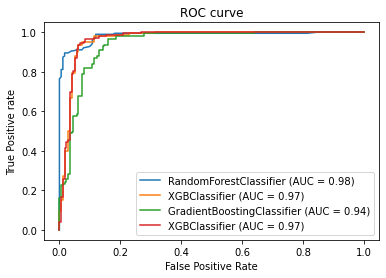

In [513]:
from sklearn.metrics import roc_curve,roc_auc_score,plot_roc_curve
disp = plot_roc_curve(clf,x_test,y_test)

plot_roc_curve(bg,x_test,y_test,ax=disp.ax_)
plot_roc_curve(gd,x_test,y_test,ax=disp.ax_)
plot_roc_curve(dt,x_test,y_test,ax=disp.ax_)


plt.title('ROC curve')

plt.xlabel('False Positive Rate')

plt.ylabel('True Positive rate')

plt.legend(loc='best')
plt.show()

In [514]:
import pickle
filename='insurance_fraud.pk1'
pickle.dump(bg,open(filename,'wb'))